# Part 3: Visualizing Time Series Data #

1. Plotting the Time Series Data

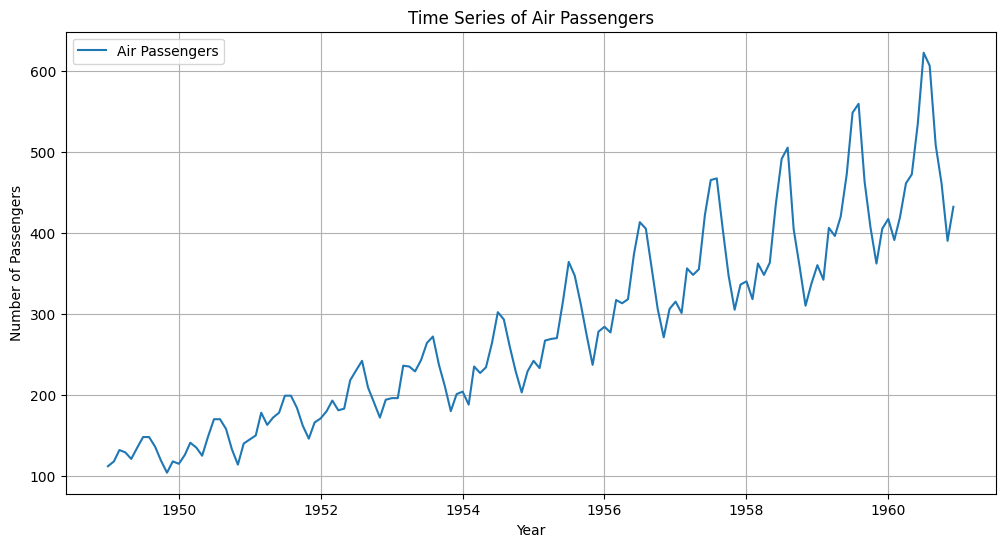

In [1]:
# Import Libraries and Load Data
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Plotting the entire time series data
plt.figure(figsize=(12, 6))
plt.plot(df['#Passengers'], label='Air Passengers')
plt.title('Time Series of Air Passengers')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

The plot provides a comprehensive view of the air passenger time series data over a period spanning from 1950 to 1960. The line chart clearly shows a long-term upward trend in the number of passengers flying, indicating growth in the airline industry or increased popularity of air travel during this decade. Additionally, there is a noticeable seasonal pattern within each year, with peaks that likely correspond to popular travel seasons, such as holidays or summer vacations.

The consistent upward trend could be due to various factors such as economic growth, technological advancements in aviation, or increasing globalization. The cyclical nature observed within each year suggests a strong seasonal component, which is typical for airline data due to factors like weather, holidays, and school vacations.

2. Zooming into a Specific Time Range

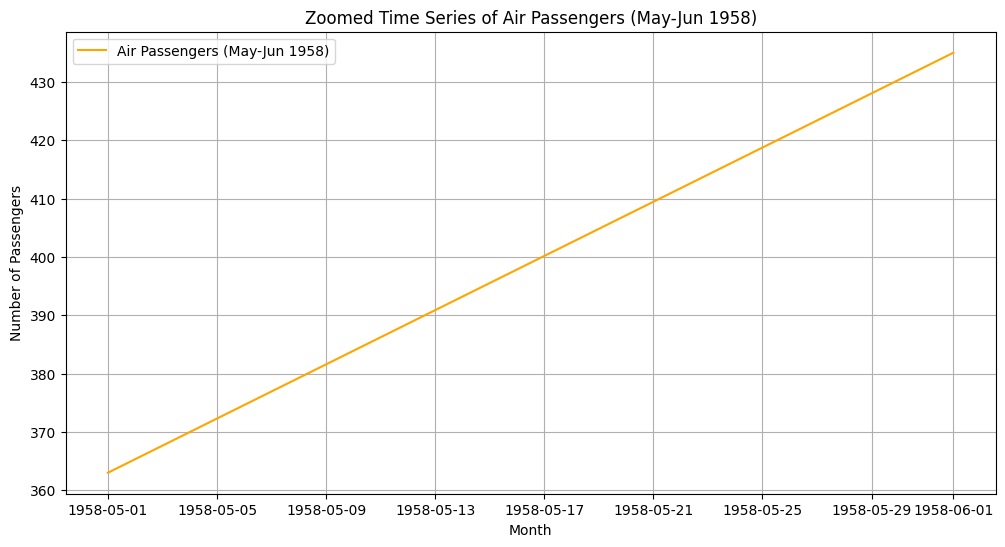

In [4]:
# Selecting a 2-month range for zoomed-in view - Example: May and June 1950
start_date = '1958-05-01'
end_date = '1958-06-30'
df_zoomed = df.loc[start_date:end_date]

# Plotting the zoomed-in range
plt.figure(figsize=(12, 6))
plt.plot(df_zoomed.index, df_zoomed['#Passengers'], label='Air Passengers (May-Jun 1958)', color='orange')
plt.title('Zoomed Time Series of Air Passengers (May-Jun 1958)')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

The plot zooms into a two-month period, specifically May and June of 1958. This detailed view reveals the fluctuations within a much shorter timeframe that are not discernible in the first plot. The trend line in this zoomed-in plot shows a steady increase in the number of passengers over these two months.

The key difference between the first and second plot is the level of granularity. While the first plot is ideal for observing long-term trends and seasonality, the second plot allows for the observation of short-term trends and potential anomalies or outliers that may occur on a smaller scale. This can be particularly useful for identifying specific events or changes that may have affected air travel during this period.

3. Add linear or polynomial trend lines to your time series dataset

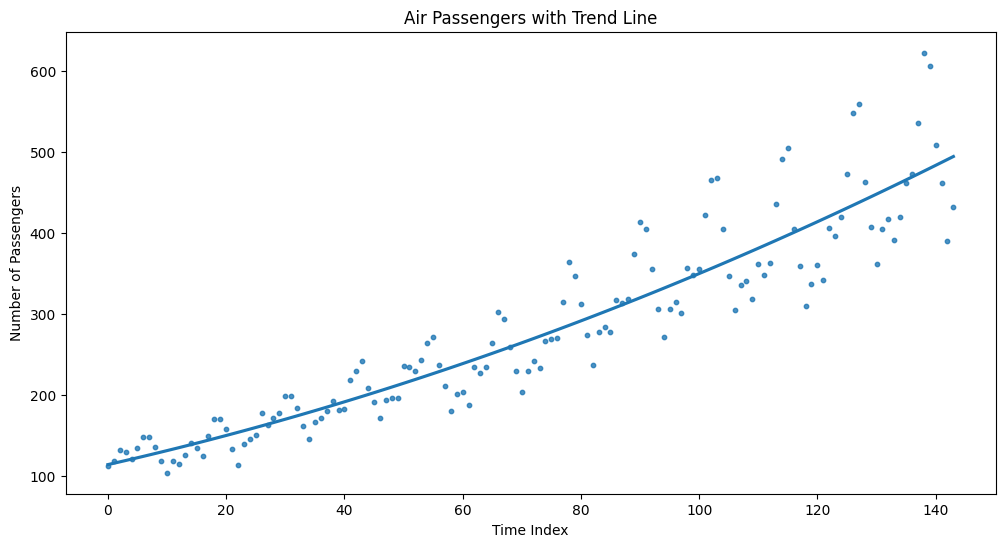

In [5]:
import seaborn as sns

# Create a new DataFrame with a numeric index for regplot
df_trend = df.reset_index()
df_trend['Time_Index'] = df_trend.index

# Plot with a trend line using seaborn's regplot
plt.figure(figsize=(12, 6))
sns.regplot(x='Time_Index', y='#Passengers', data=df_trend, order=2, ci=None, scatter_kws={'s': 10})
plt.title('Air Passengers with Trend Line')
plt.xlabel('Time Index')
plt.ylabel('Number of Passengers')
plt.show()


Air Passengers with Trend Line:

The scatter plot with a trend line shows a clear upward trajectory in the number of air passengers over time. The trend line, which appears to be linear, indicates a steady increase in passenger numbers, suggesting a strong and consistent growth pattern in the data. This growth could be attributed to factors like economic expansion, population growth, technological advances in aviation, or a combination of these and other factors.

4. Suppress Seasonality

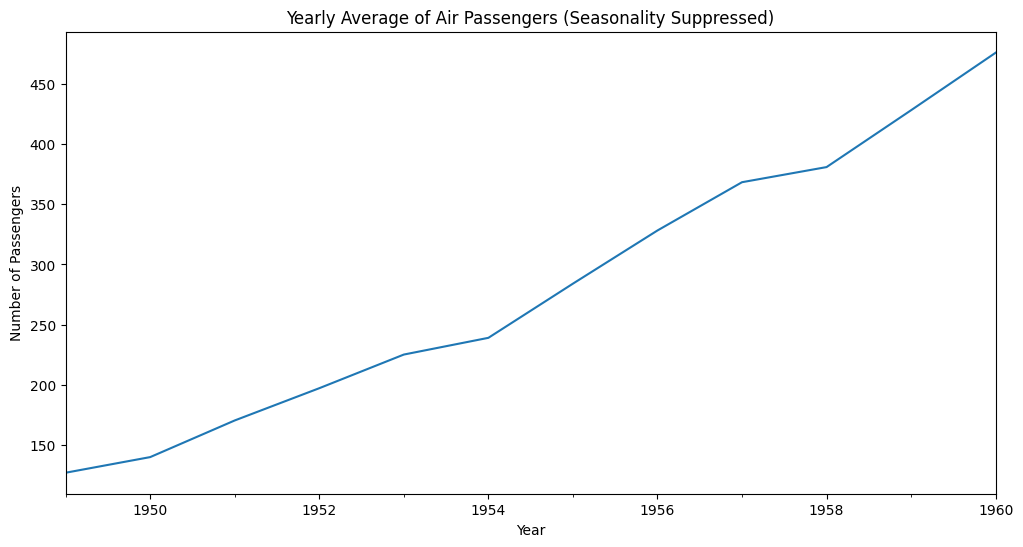

In [6]:
# Aggregate data using the mean function at the yearly level
df_yearly_mean = df['#Passengers'].resample('Y').mean()

# Plot the yearly averages to observe the trend without seasonality
plt.figure(figsize=(12, 6))
df_yearly_mean.plot()
plt.title('Yearly Average of Air Passengers (Seasonality Suppressed)')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()


Yearly Average of Air Passengers (Seasonality Suppressed):

The line chart depicting the yearly average of air passengers, with seasonality suppressed, smooths out the seasonal fluctuations and reveals the underlying trend. The graph shows an unmistakable upward trend, suggesting that, aside from seasonal effects, the demand for air travel has been growing year over year. The absence of the seasonal peaks and troughs in this plot allows for a clearer view of the long-term direction and pace of growth.

In [8]:
df_yearly_mean.head

<bound method NDFrame.head of Month
1949-12-31    126.666667
1950-12-31    139.666667
1951-12-31    170.166667
1952-12-31    197.000000
1953-12-31    225.000000
1954-12-31    238.916667
1955-12-31    284.000000
1956-12-31    328.250000
1957-12-31    368.416667
1958-12-31    381.000000
1959-12-31    428.333333
1960-12-31    476.166667
Freq: A-DEC, Name: #Passengers, dtype: float64>

5. Lag Scatter Plot

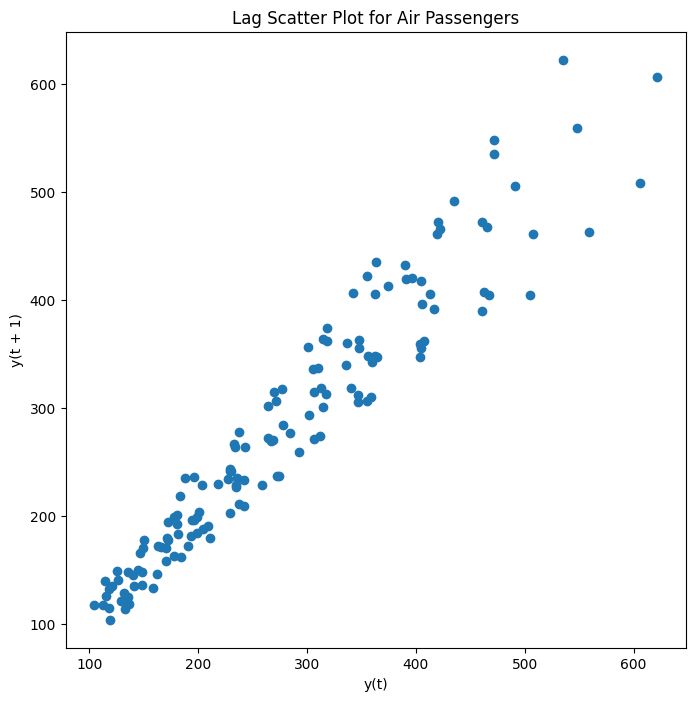

In [9]:
from pandas.plotting import lag_plot

# Plot a scatter plot to test the correlation between lag values
plt.figure(figsize=(8, 8))
lag_plot(df['#Passengers'])
plt.title('Lag Scatter Plot for Air Passengers')
plt.show()


Lag Scatter Plot for Air Passengers:

The lag scatter plot presents the relationship between each data point and its previous value (lagged by one time unit). The strong positive correlation shown by the clustering of points along a line from the bottom left to the top right indicates that higher passenger numbers in one period are likely to be followed by higher numbers in the following period. This pattern is typical of time series data with both trend and seasonality components, where past values provide information about future values.

6. Autocorrelation Plots

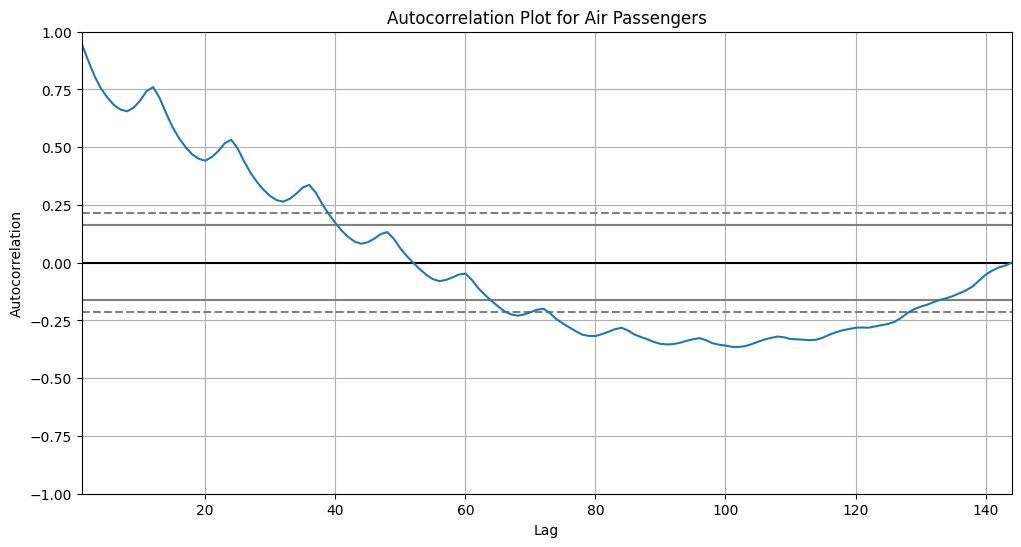

In [10]:
from pandas.plotting import autocorrelation_plot

# Plot autocorrelation for all possible lag values
plt.figure(figsize=(12, 6))
autocorrelation_plot(df['#Passengers'])
plt.title('Autocorrelation Plot for Air Passengers')
plt.show()


Autocorrelation Plot for Air Passengers:

The autocorrelation plot illustrates how the time series data correlates with itself across different lags. The gradual decline followed by seasonal peaks at regular intervals indicates that the series is not only dependent on recent past values (as shown by the high initial autocorrelation) but also exhibits a seasonal pattern. The plot suggests that the data has both autoregressive components and seasonal dependencies, which should be considered when developing forecasting models.



6. The autocorrelation function (ACF) and partial autocorrelation function (PACF) are crucial tools in time series analysis, particularly in the context of ARIMA modeling. The ACF helps identify the presence of autocorrelation in the data, which can inform the selection of the moving average (MA) component in an ARIMA model. The PACF, on the other hand, isolates the autocorrelation after removing the effects of shorter lags, which is useful for determining the order of the autoregressive (AR) component. By examining the ACF and PACF, you can better specify the terms of ARIMA models, which can significantly improve forecast accuracy.